# Exploratory Data Analysis

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import random
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from userkits.utils import load_train_data

In [2]:
X, y = load_train_data()

Loading train data: 100%|██████████| 29/29 [00:23<00:00,  1.22it/s]


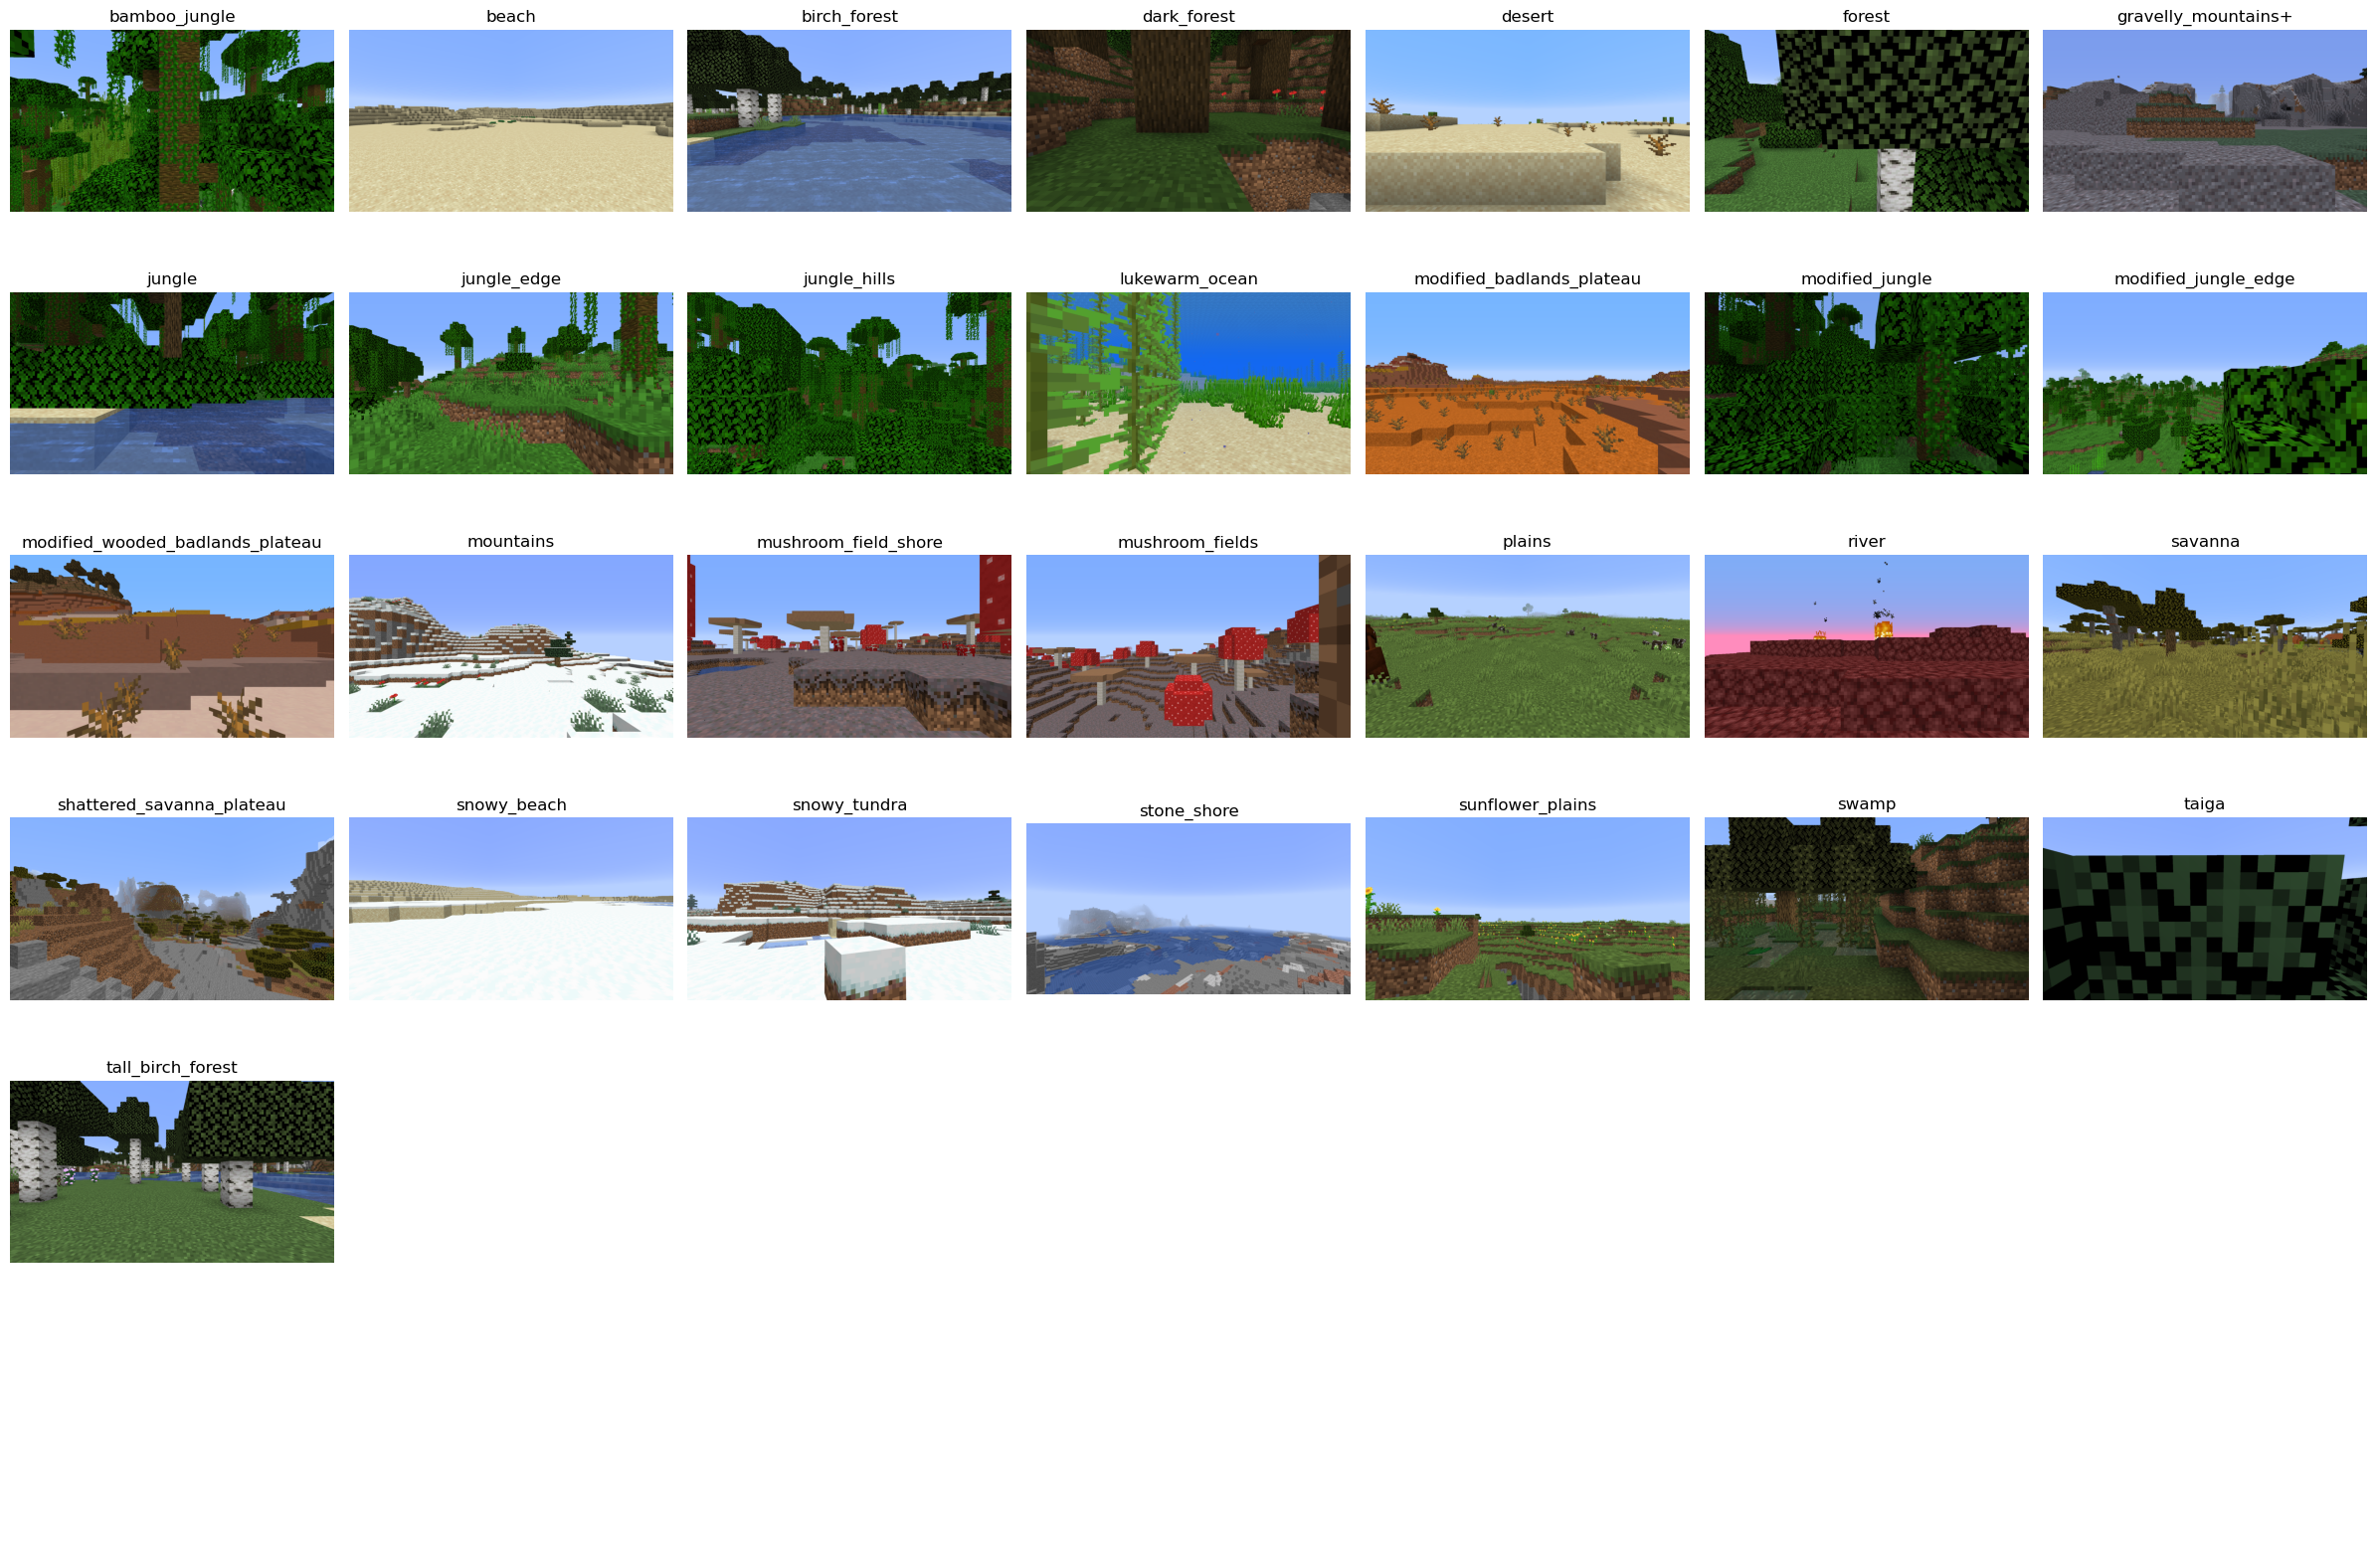

In [3]:
data_dir = '../train_data'
fig, axes = plt.subplots(6, 7, figsize=(24, 16))
axes = axes.flatten()

for idx, cls in enumerate(np.unique(y)):
    cls_folder = os.path.join(data_dir, cls)
    sample_images = [os.path.join(cls_folder, fname) for fname in os.listdir(cls_folder) if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    img = Image.open(sample_images[0])
    axes[idx].imshow(img)
    axes[idx].set_title(cls)
for ax in axes:
    ax.axis('off')
        
plt.tight_layout()
plt.show()

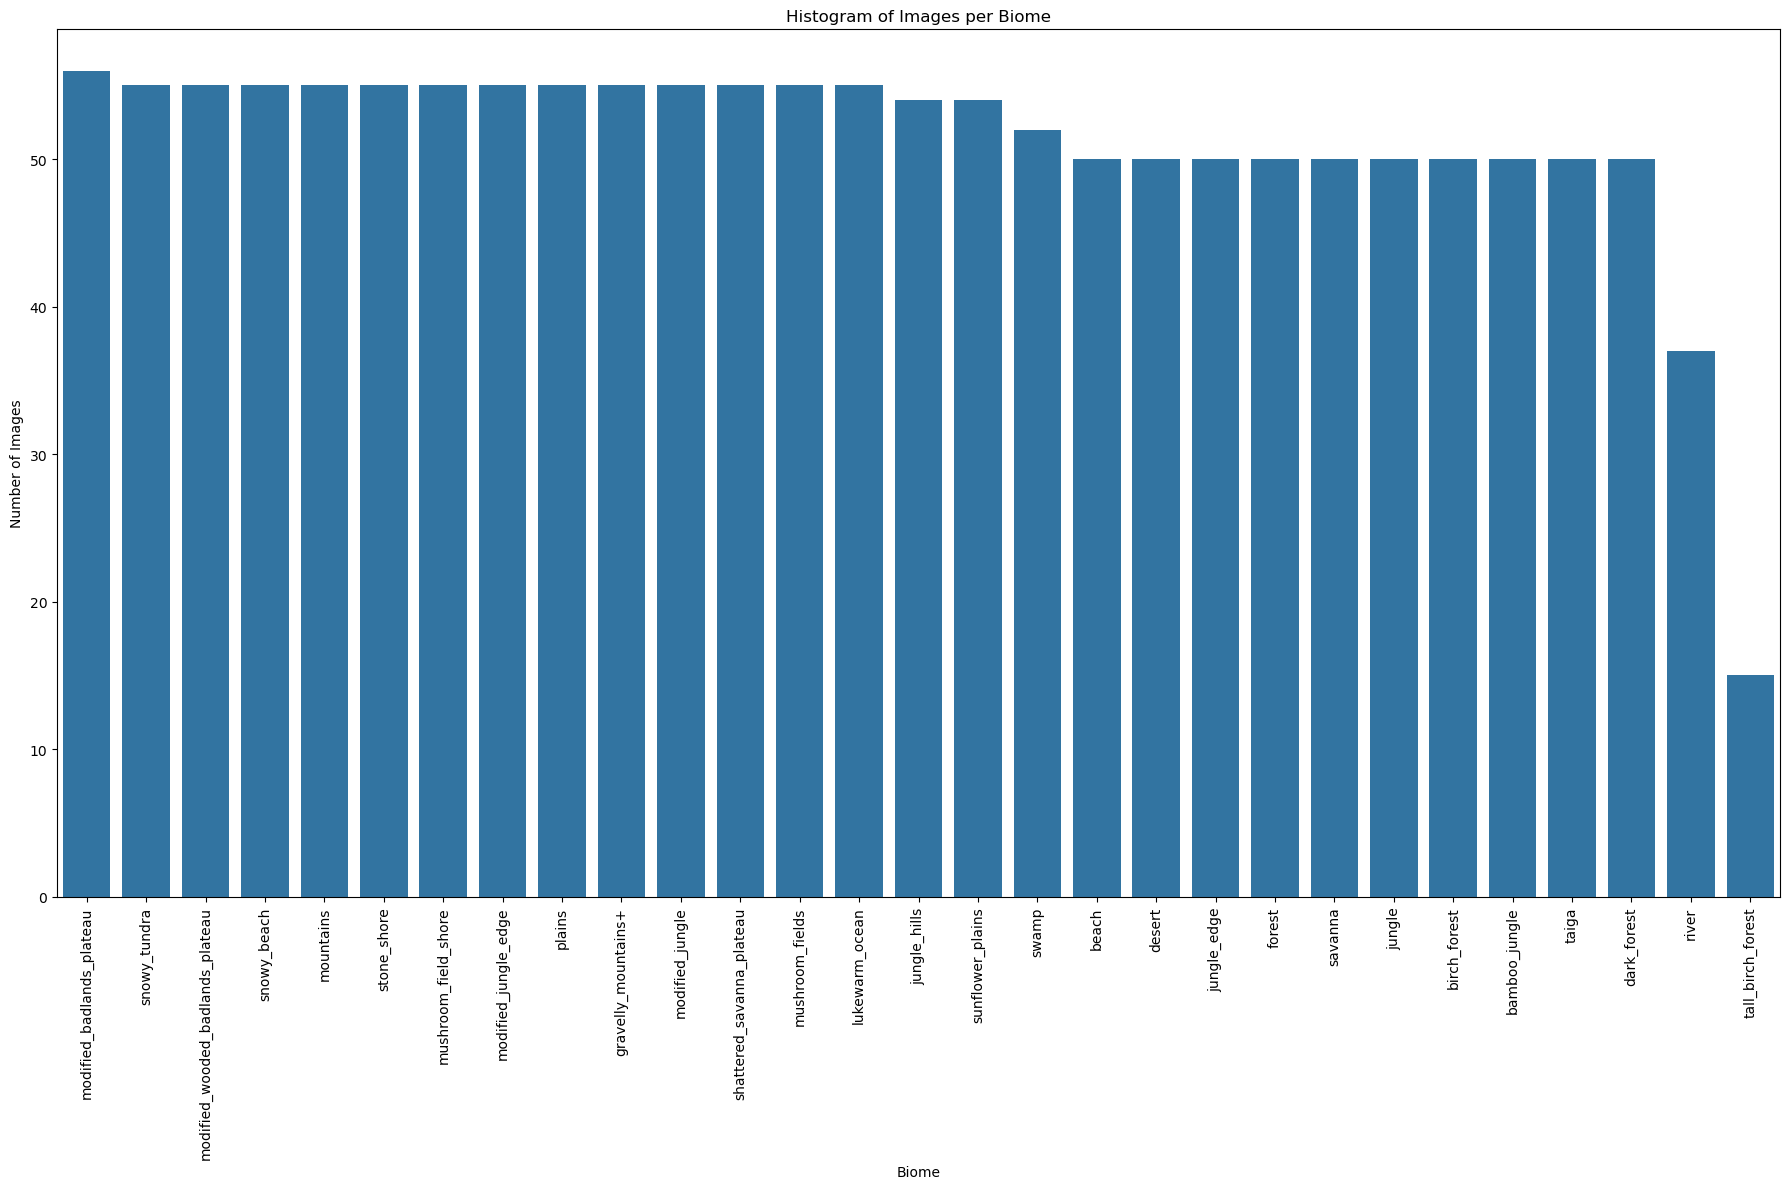

In [4]:
biome_counts = pd.Series(y).value_counts()

plt.figure(figsize=(18, 12))
sns.barplot(x=biome_counts.index, y=biome_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Biome')
plt.ylabel('Number of Images')
plt.title('Histogram of Images per Biome')
plt.tight_layout()
plt.show()

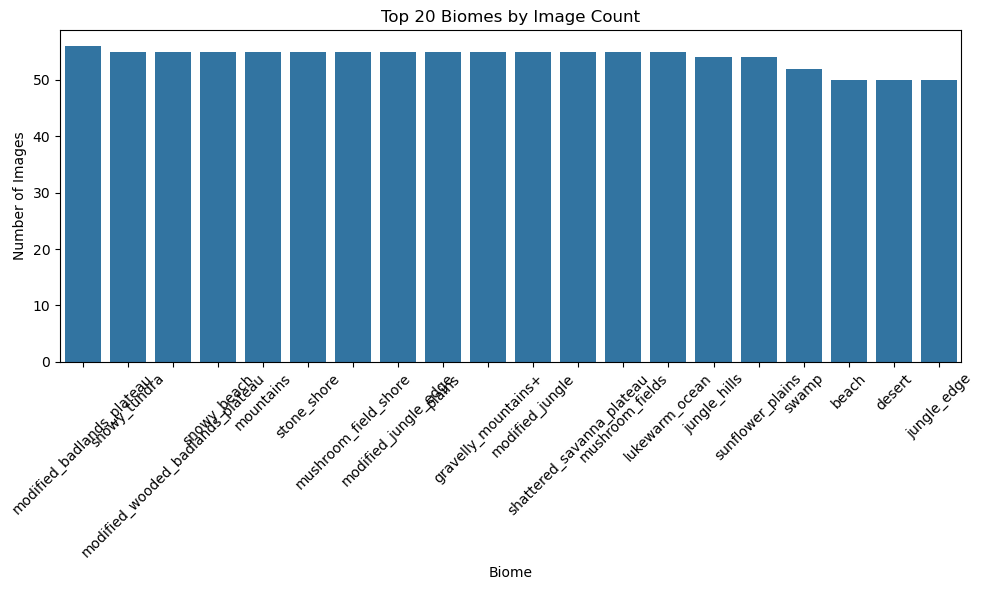

In [5]:
# Plot top 10 biomes by image count
top10 = biome_counts.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.xlabel('Biome')
plt.ylabel('Number of Images')
plt.title('Top 20 Biomes by Image Count')
plt.tight_layout()
plt.show()

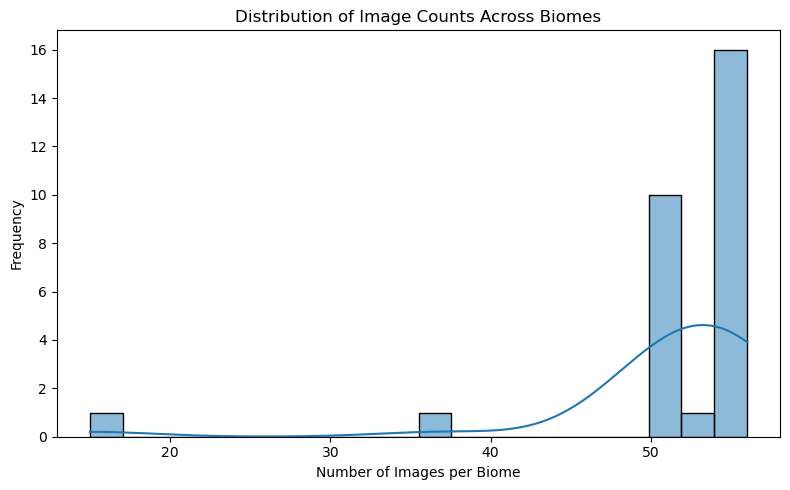

In [6]:
# Distribution of image counts
plt.figure(figsize=(8, 5))
sns.histplot(biome_counts.values, bins=20, kde=True)
plt.xlabel('Number of Images per Biome')
plt.ylabel('Frequency')
plt.title('Distribution of Image Counts Across Biomes')
plt.tight_layout()
plt.show()

In [7]:
# Number of unique biomes
print(f"Number of unique biomes: {len(biome_counts)}")

# Most and least represented biomes
print(f"Most represented biome: {biome_counts.idxmax()} ({biome_counts.max()} images)")
print(f"Least represented biome: {biome_counts.idxmin()} ({biome_counts.min()} images)")

Number of unique biomes: 29
Most represented biome: modified_badlands_plateau (56 images)
Least represented biome: tall_birch_forest (15 images)


In [8]:
top5_biomes = top10.head(5).index
avg_rgb = {}

for biome in top5_biomes:
    biome_folder = os.path.join(data_dir, biome)
    image_files = [f for f in os.listdir(biome_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    r_total, g_total, b_total, n_pixels = 0, 0, 0, 0
    for fname in tqdm(image_files, desc=f'Processing {biome}'):
        img_path = os.path.join(biome_folder, fname)
        img = Image.open(img_path).convert('RGB')
        arr = np.array(img)
        r_total += arr[..., 0].sum()
        g_total += arr[..., 1].sum()
        b_total += arr[..., 2].sum()
        n_pixels += arr.shape[0] * arr.shape[1]
    avg_rgb[biome] = {
        'R': r_total / n_pixels,
        'G': g_total / n_pixels,
        'B': b_total / n_pixels
    }

for biome, rgb in avg_rgb.items():
    print(f"Average RGB for {biome}: R={rgb['R']:.2f}, G={rgb['G']:.2f}, B={rgb['B']:.2f}")

Processing modified_badlands_plateau:   0%|          | 0/56 [00:00<?, ?it/s]

Processing snowy_tundra:   0%|          | 0/55 [00:00<?, ?it/s]

Processing modified_wooded_badlands_plateau:   0%|          | 0/55 [00:00<?, ?it/s]

Processing snowy_beach:   0%|          | 0/55 [00:00<?, ?it/s]

Processing mountains:   0%|          | 0/55 [00:00<?, ?it/s]

Average RGB for modified_badlands_plateau: R=130.58, G=115.14, B=116.11
Average RGB for snowy_tundra: R=173.83, G=187.12, B=214.21
Average RGB for modified_wooded_badlands_plateau: R=130.67, G=116.81, B=120.39
Average RGB for snowy_beach: R=182.97, G=199.58, B=233.84
Average RGB for mountains: R=113.76, G=125.16, B=141.96


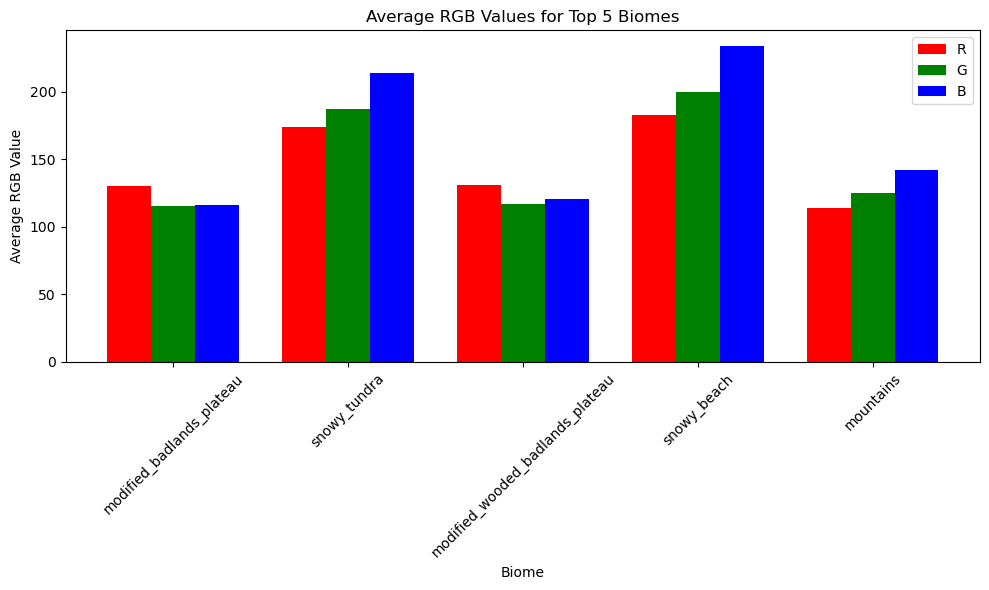

In [9]:
# Plot average RGB values for the top 5 biomes
biome_names = list(avg_rgb.keys())
avg_r = [avg_rgb[b]['R'] for b in biome_names]
avg_g = [avg_rgb[b]['G'] for b in biome_names]
avg_b = [avg_rgb[b]['B'] for b in biome_names]

x = np.arange(len(biome_names))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, avg_r, width, color='r', label='R')
plt.bar(x, avg_g, width, color='g', label='G')
plt.bar(x + width, avg_b, width, color='b', label='B')
plt.xticks(x, biome_names, rotation=45)
plt.xlabel('Biome')
plt.ylabel('Average RGB Value')
plt.title('Average RGB Values for Top 5 Biomes')
plt.legend()
plt.tight_layout()
plt.show()

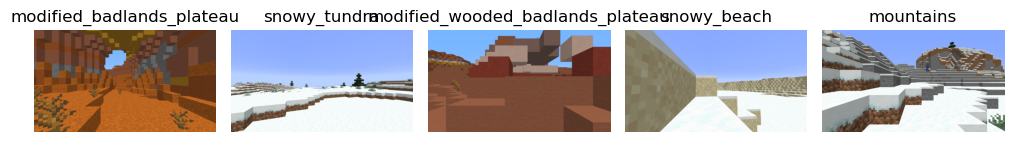

In [10]:
# Display random images from the top 5 biomes for visual inspection
plt.figure(figsize=(10, 20))
for i, biome in enumerate(top5_biomes):
    biome_folder = os.path.join(data_dir, biome)
    image_files = [f for f in os.listdir(biome_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    rand_img = random.choice(image_files)
    img_path = os.path.join(biome_folder, rand_img)
    img = Image.open(img_path)
    ax = plt.subplot(1, 5, i + 1)
    ax.imshow(img)
    ax.set_title(biome)
    ax.axis('off')
plt.tight_layout()
plt.show()

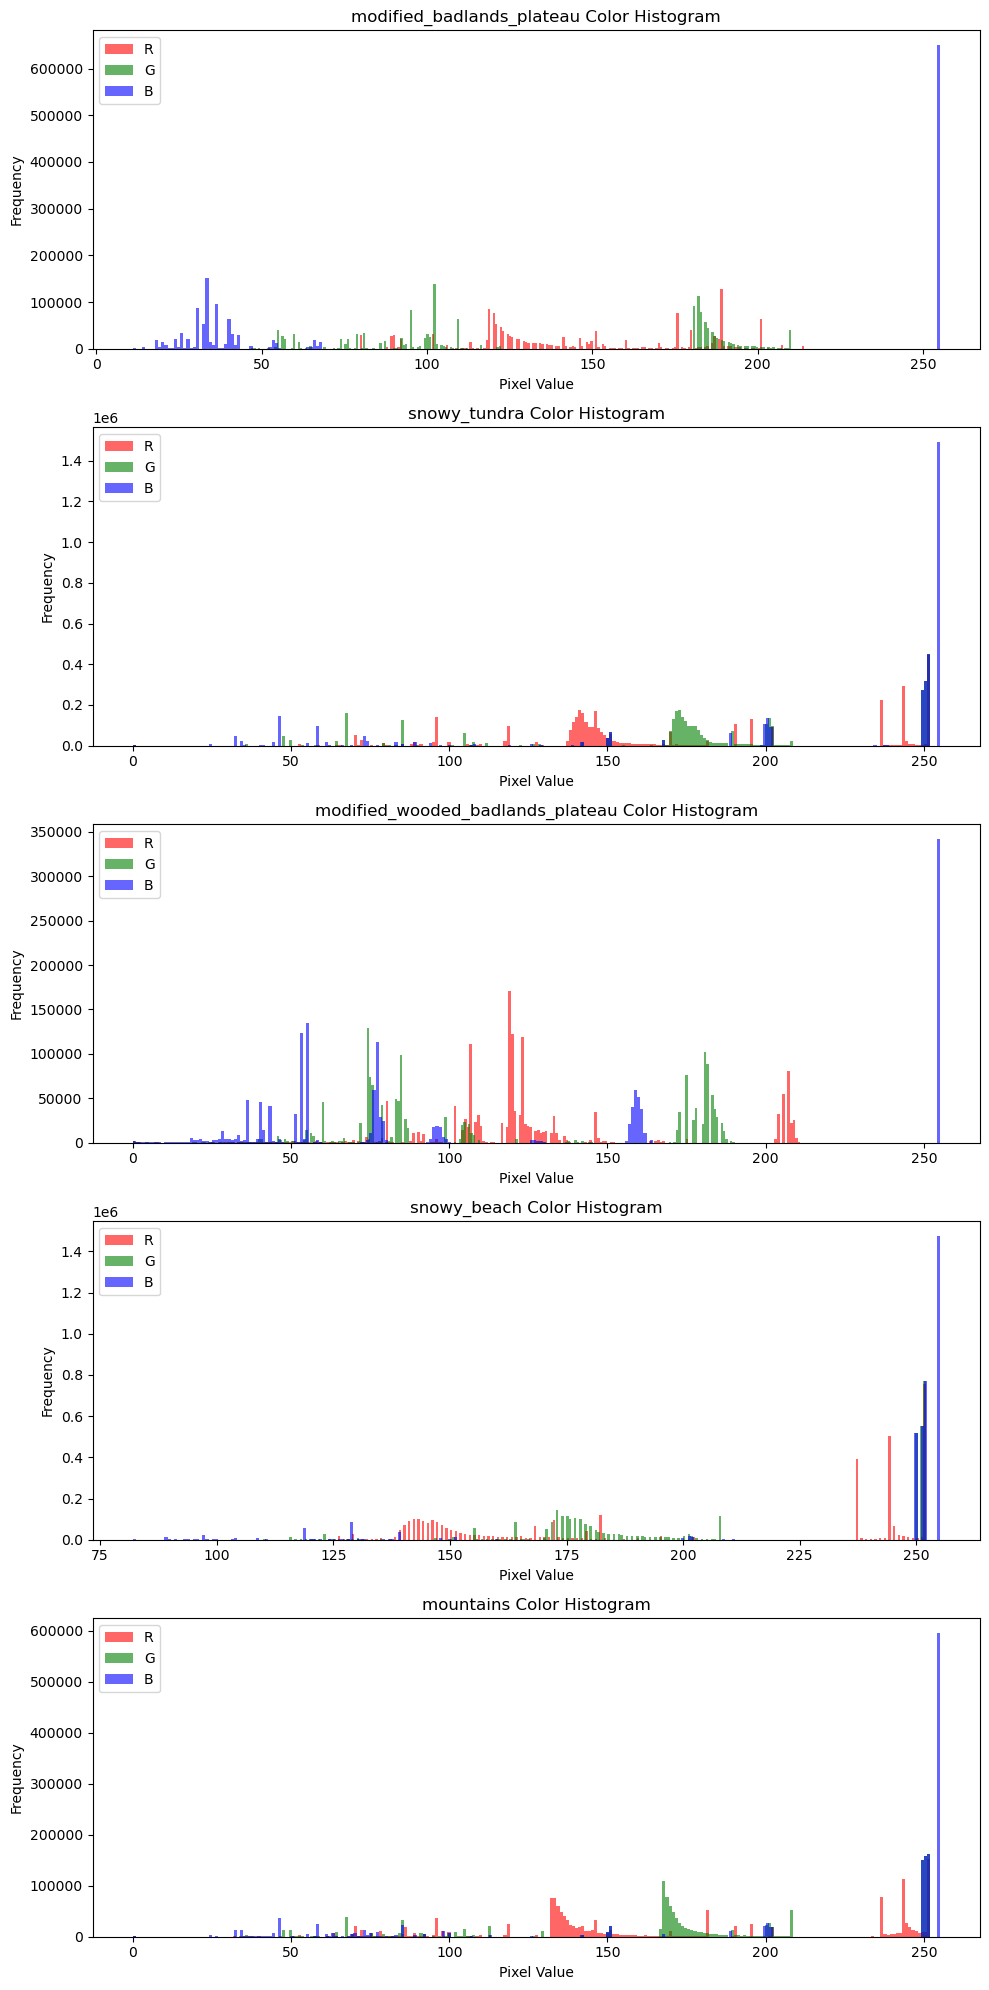

In [11]:
# Show color histograms for each of the top 5 biomes
plt.figure(figsize=(10, 20))
for i, biome in enumerate(top5_biomes):
    biome_folder = os.path.join(data_dir, biome)
    image_files = [f for f in os.listdir(biome_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    img_path = os.path.join(biome_folder, image_files[0])
    img = Image.open(img_path).convert('RGB')
    arr = np.array(img)
    plt.subplot(5, 1, i + 1)
    plt.hist(arr[..., 0].ravel(), bins=256, color='r', alpha=0.6, label='R')
    plt.hist(arr[..., 1].ravel(), bins=256, color='g', alpha=0.6, label='G')
    plt.hist(arr[..., 2].ravel(), bins=256, color='b', alpha=0.6, label='B')
    plt.title(f'{biome} Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()